# COVID-19 Straipsnių Analizė

Šiame iššūkyje tęsime COVID pandemijos temą ir sutelksime dėmesį į mokslinių straipsnių šia tema apdorojimą. Yra [CORD-19 duomenų rinkinys](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge), kuriame yra daugiau nei 7000 (rašymo metu) straipsnių apie COVID, pateikiamų su metaduomenimis ir santraukomis (o apie pusę jų taip pat yra pateiktas visas tekstas).

Pilnas šio duomenų rinkinio analizės pavyzdys naudojant [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) kognityvinę paslaugą aprašytas [šiame tinklaraščio įraše](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/). Mes aptarsime supaprastintą šios analizės versiją.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Duomenų gavimas

Pirmiausia mums reikia gauti CORD straipsnių metaduomenis, su kuriais dirbsime.

**NOTE**: Mes nesuteikiame duomenų rinkinio kopijos kaip šio saugyklos dalies. Pirmiausia gali tekti atsisiųsti [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) failą iš [šio duomenų rinkinio Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge). Gali prireikti registracijos Kaggle platformoje. Taip pat galite atsisiųsti duomenų rinkinį be registracijos [iš čia](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), tačiau jis apims visus pilnus tekstus kartu su metaduomenų failu.

Mes bandysime gauti duomenis tiesiogiai iš internetinio šaltinio, tačiau, jei tai nepavyks, jums reikės atsisiųsti duomenis, kaip aprašyta aukščiau. Be to, prasminga atsisiųsti duomenis, jei planuojate su jais eksperimentuoti toliau, kad sutaupytumėte laukimo laiką.

> **NOTE** kad duomenų rinkinys yra gana didelis, apie 1 Gb dydžio, ir šis kodo eilutė gali užtrukti ilgai! (~5 min)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Dabar konvertuosime publikavimo datos stulpelį į `datetime` ir nubraižysime histogramą, kad pamatytume publikavimo datų diapazoną.


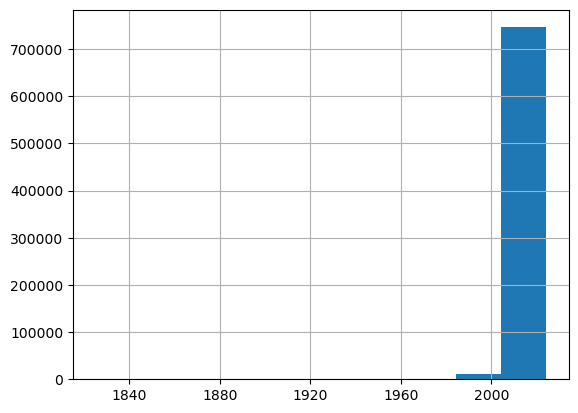

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## Struktūruotų duomenų išgavimas

Pažiūrėkime, kokią informaciją galime lengvai išgauti iš santraukų. Vienas iš dalykų, kuris gali mus dominti, yra tai, kokios gydymo strategijos egzistuoja ir kaip jos keitėsi laikui bėgant. Pirmiausia galime rankiniu būdu sudaryti galimų vaistų, naudojamų COVID gydymui, sąrašą, taip pat diagnozių sąrašą. Tada peržiūrime juos ir ieškome atitinkamų terminų straipsnių santraukose.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


Pridėjome keletą stulpelių į mūsų duomenų rėmelį, kurie rodo, kiek kartų tam tikras vaistas/diagnozė yra paminėta santraukoje.

> **Pastaba**: ieškodami posantraukos, pridedame tarpą žodžio pradžioje. Jei to nedarytume, galėtume gauti neteisingus rezultatus, nes *chloroquine* taip pat būtų rasta posantraukoje *hydroxychloroquine*. Be to, priverstinai konvertuojame santraukų stulpelį į `str`, kad išvengtume klaidos – pabandykite pašalinti `str` ir pažiūrėkite, kas nutiks.

Kad būtų lengviau dirbti su duomenimis, galime išskirti subrėmelį, kuriame yra tik vaistų skaičiavimai, ir apskaičiuoti bendrą pasikartojimų skaičių. Tai leidžia nustatyti populiariausią vaistą:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

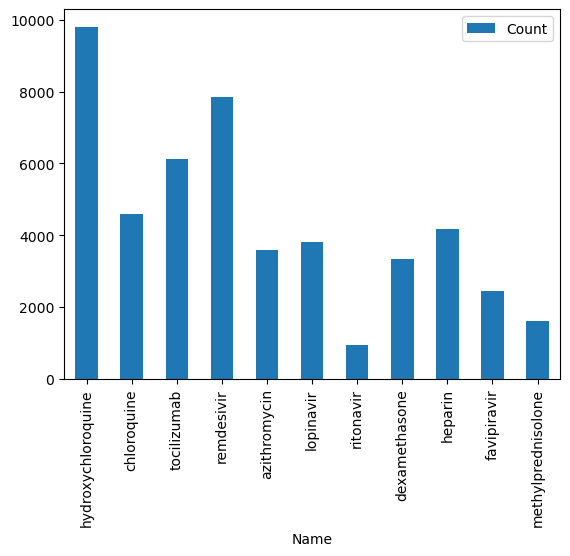

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## Ieškant gydymo strategijos tendencijų

Pateiktame pavyzdyje mes `sum`avome visas reikšmes, tačiau tą patį galime atlikti ir mėnesiniu pagrindu:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

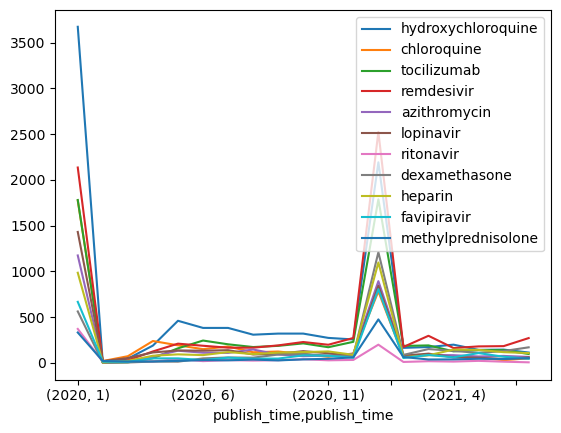

In [152]:
dfmt.plot()
plt.show()

Įdomus pastebėjimas yra tas, kad turime didelius šuolius dviejose vietose: 2020 m. sausį ir 2021 m. sausį. Tai lemia faktas, kad kai kuriuose straipsniuose nėra aiškiai nurodyta publikavimo data, todėl ji nurodoma kaip atitinkamų metų sausis.

Kad duomenys būtų aiškesni, vizualizuokime tik kelis vaistus. Taip pat „ištrinsime“ sausio mėnesio duomenis ir užpildysime juos vidutine reikšme, kad grafikas atrodytų gražiau:


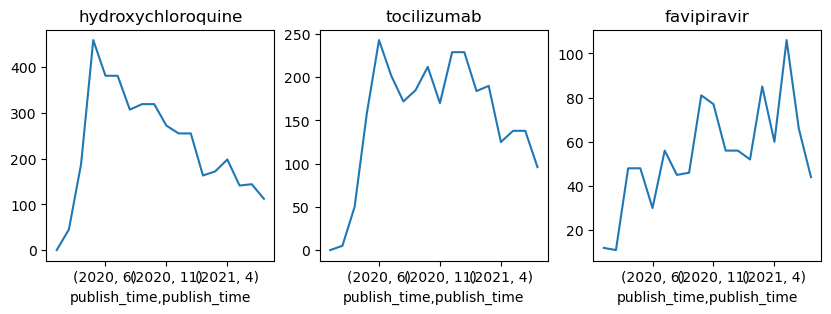

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

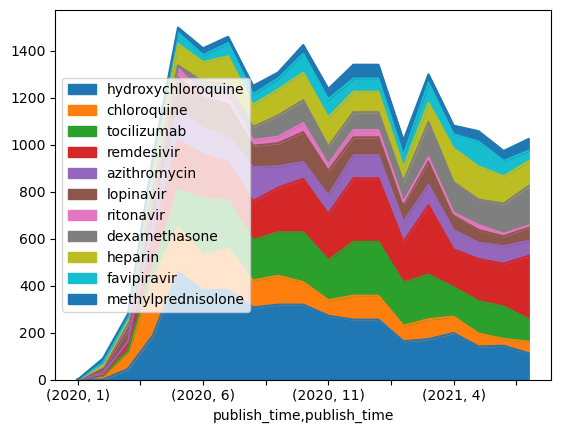

In [154]:
dfmt.plot.area()
plt.show()

Dar daugiau, mes galime apskaičiuoti santykinį populiarumą procentais:


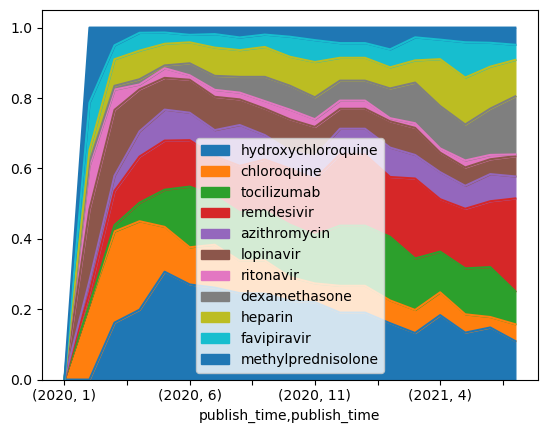

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## Medicinos ir diagnozės atitikimo skaičiavimas

Viena iš įdomiausių sąsajų, kurias galime tirti, yra tai, kaip skirtingos diagnozės gydomos skirtingais vaistais. Norėdami tai vizualizuoti, turime apskaičiuoti **bendro pasirodymo dažnio žemėlapį**, kuris parodys, kiek kartų du terminai paminėti tame pačiame straipsnyje.

Toks žemėlapis iš esmės yra 2D matrica, kuri geriausiai atvaizduojama kaip **numpy masyvas**. Šį žemėlapį apskaičiuosime peržiūrėdami visus santraukas ir pažymėdami ten pasirodančias esybes:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

Vienas iš būdų vizualizuoti šią matricą yra nupiešti **šilumos žemėlapį**:


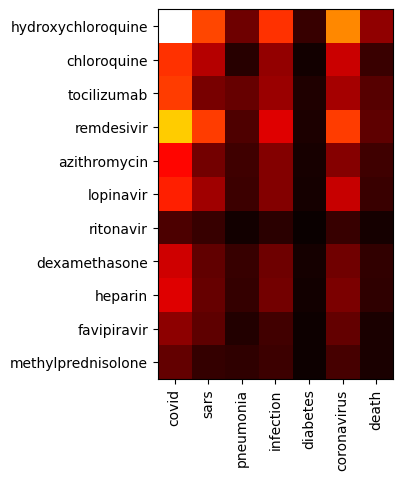

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Tačiau dar geresnė vizualizacija gali būti pasiekta naudojant vadinamąją **Sankey** diagramą! `matplotlib` neturi įmontuotos šio diagramos tipo palaikymo, todėl turėsime naudoti [Plotly](https://plotly.com/python/), kaip aprašyta [šiame vadove](https://plotly.com/python/sankey-diagram/).

Norint sukurti plotly sankey diagramą, reikia sudaryti šiuos sąrašus:
* Sąrašą `all_nodes` su visais grafiko mazgais, kuris apims tiek vaistus, tiek diagnozes
* Šaltinio ir tikslo indeksų sąrašus – šie sąrašai parodys, kurie mazgai eina į kairę, o kurie į dešinę diagramos dalį
* Visų ryšių sąrašą, kiekvienas ryšys susideda iš:
   - Šaltinio indekso `all_nodes` masyve
   - Tikslo indekso
   - Vertės, nurodančios ryšio stiprumą. Tai yra būtent vertė iš mūsų koegzistencijos matricos.
   - Pasirinktinai ryšio spalvos. Mes pridėsime galimybę paryškinti kai kuriuos terminus, kad būtų aiškiau.

Bendras kodas sankey diagramai piešti yra struktūrizuotas kaip atskira `sankey` funkcija, kuri priima du sąrašus (šaltinio ir tikslo kategorijas) ir koegzistencijos matricą. Ji taip pat leidžia mums nurodyti slenkstinę vertę ir pašalinti visus ryšius, kurie yra silpnesni už tą slenkstinę vertę – tai padaro diagramą šiek tiek mažiau sudėtingą.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## Išvada

Jūs matėte, kad galime naudoti gana paprastus metodus informacijai išgauti iš nestruktūruotų duomenų šaltinių, tokių kaip tekstas. Šiame pavyzdyje mes pasinaudojome esamu vaistų sąrašu, tačiau daug galingesnis būdas būtų naudoti natūralios kalbos apdorojimo (NLP) technikas, kad būtų galima išgauti objektus iš teksto. [Šiame tinklaraščio įraše](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) aprašome, kaip naudoti debesų paslaugas objektų išgavimui. Kita galimybė būtų naudoti Python NLP bibliotekas, tokias kaip [NLTK](https://www.nltk.org/) – požiūris, kaip išgauti informaciją iš teksto naudojant NLTK, aprašytas [čia](https://www.nltk.org/book/ch07.html).


## Iššūkis

Tęskite COVID straipsnių duomenų tyrimą pagal šias kryptis:

1. Sukurkite skirtingų vaistų bendro pasirodymo matricą ir pažiūrėkite, kurie vaistai dažnai pasirodo kartu (t. y. paminėti viename santraukoje). Galite modifikuoti kodą, skirtą vaistų ir diagnozių bendro pasirodymo matricai kurti.
1. Vizualizuokite šią matricą naudodami šilumos žemėlapį.
1. Kaip papildomą užduotį, galite pabandyti vizualizuoti vaistų bendrą pasirodymą naudodami [chord diagramą](https://en.wikipedia.org/wiki/Chord_diagram). [Ši biblioteka](https://pypi.org/project/chord/) gali padėti jums nupiešti chord diagramą.
1. Kaip dar vieną papildomą užduotį, pabandykite išgauti skirtingų vaistų dozes (pvz., **400mg** frazėje *vartokite 400mg chlorokvino kasdien*) naudodami reguliarias išraiškas ir sukurkite duomenų rėmelį, kuris parodytų skirtingas dozes skirtingiems vaistams. **Pastaba**: atsižvelkite į skaitines reikšmes, kurios yra arti vaisto pavadinimo tekste.



---

**Atsakomybės apribojimas**:  
Šis dokumentas buvo išverstas naudojant AI vertimo paslaugą [Co-op Translator](https://github.com/Azure/co-op-translator). Nors siekiame tikslumo, prašome atkreipti dėmesį, kad automatiniai vertimai gali turėti klaidų ar netikslumų. Originalus dokumentas jo gimtąja kalba turėtų būti laikomas autoritetingu šaltiniu. Kritinei informacijai rekomenduojama naudoti profesionalų žmogaus vertimą. Mes neprisiimame atsakomybės už nesusipratimus ar klaidingus interpretavimus, atsiradusius dėl šio vertimo naudojimo.
